In [56]:
import pandas as pd

In [57]:
from jupyter_dash import JupyterDash
from dash import dcc
from dash import html
import plotly.express as px
import plotly.graph_objects as go

In [58]:
# app = JupyterDash(__name__)

# possession_df = df.sort_values("Possession%")
# fig = px.bar(possession_df, x="Team", y="Possession%")

# app.layout = html.Div(children=[
#     html.H1(children='Possesion by Teams'),

#     html.Div(children='''
#         Dash: A web application framework for your data.
#     '''),

#     dcc.Graph(
#         id='possession-graph',
#         figure=fig
#     )
# ])

In [59]:
# app.run_server(mode="inline", port=8060)

# Summary Stats

In [60]:
import os

In [61]:
def get_all_team_stats(league):
    all_team_stats = {
        "Season": [],
        "Total Goals": [],
        "Avg Shots Pg": [],
        "Avg Possession%": [],
        "Avg Successful Pass%": [],
        "Avg Aerials Won": []
    }

    for dir in os.listdir(f'data\\{league}'):
        all_team_stats["Season"].append(dir)
        path = os.path.join(f'data\\{league}', dir, 'stage-team-stats-summary.csv')
        df = pd.read_csv(path)
        all_team_stats["Total Goals"].append(df["Goals"].sum())
        all_team_stats["Avg Shots Pg"].append(df["Shots pg"].mean())
        all_team_stats["Avg Possession%"].append(df["Possession%"].mean())
        all_team_stats["Avg Successful Pass%"].append(df["Pass%"].mean())
        all_team_stats["Avg Aerials Won"].append(df["AerialsWon"].mean())   

    all_team_stats_df = pd.DataFrame.from_dict(all_team_stats)
    return all_team_stats_df

In [62]:
def get_top5_team_stats(league):
    top5_team_stats = {
        "Season": [],
        "Total Goals": [],
        "Avg Shots Pg": [],
        "Avg Possession%": [],
        "Avg Successful Pass%": [],
        "Avg Aerials Won": []
    }

    for dir in os.listdir(f'data\\{league}'):
        top5_team_stats["Season"].append(dir)
        path = os.path.join(f'data\\{league}', dir, 'stage-team-stats-summary.csv')
        df = pd.read_csv(path)
        temp = df.sort_values("Goals", ascending=False, ignore_index=True)
        top5_team_stats["Total Goals"].append(temp.loc[0:4]["Goals"].sum())

        temp = df.sort_values("Shots pg", ascending=False, ignore_index=True)
        top5_team_stats["Avg Shots Pg"].append(temp.loc[0:4]["Shots pg"].mean())

        temp = df.sort_values("Possession%", ascending=False, ignore_index=True)
        top5_team_stats["Avg Possession%"].append(temp.loc[0:4]["Possession%"].mean())

        temp = df.sort_values("Pass%", ascending=False, ignore_index=True)
        top5_team_stats["Avg Successful Pass%"].append(temp.loc[0:4]["Pass%"].mean())

        temp = df.sort_values("AerialsWon", ascending=False, ignore_index=True)
        top5_team_stats["Avg Aerials Won"].append(temp.loc[0:4]["AerialsWon"].mean())   

    top5_team_stats_df = pd.DataFrame.from_dict(top5_team_stats)
    return top5_team_stats_df

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
laliga_all = get_all_team_stats('LaLiga')
epl_all = get_all_team_stats('EPL')
bundesliga_all = get_all_team_stats('Bundesliga')
ligue1_all = get_all_team_stats('Ligue1')
seriea_all = get_all_team_stats('SerieA')

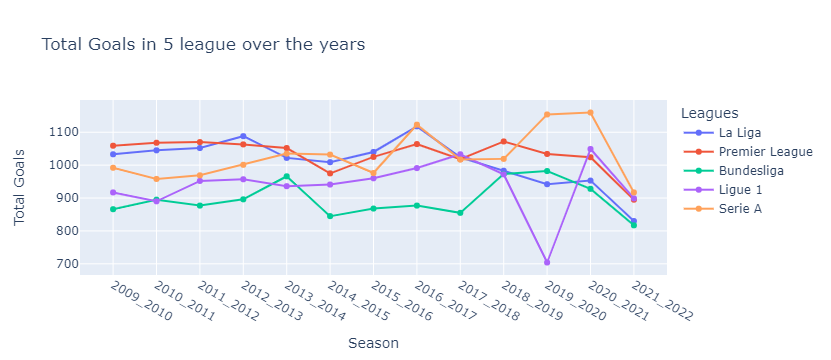

In [69]:
fig = go.Figure()
fig.add_scatter(x=laliga_all["Season"], y=laliga_all["Total Goals"], name="La Liga")
fig.add_scatter(x=epl_all["Season"], y=epl_all["Total Goals"], name="Premier League")
fig.add_scatter(x=bundesliga_all["Season"], y=bundesliga_all["Total Goals"], name="Bundesliga")
fig.add_scatter(x=ligue1_all["Season"], y=ligue1_all["Total Goals"], name="Ligue 1")
fig.add_scatter(x=seriea_all["Season"], y=seriea_all["Total Goals"], name="Serie A")
fig.update_layout(
    title="Total Goals in 5 league over the years",
    xaxis_title="Season",
    yaxis_title="Total Goals",
    legend_title="Leagues",
    # font=dict(
    #     family="Courier New, monospace",
    #     size=16,
    #     color="RebeccaPurple"
    # )
)
fig.show()

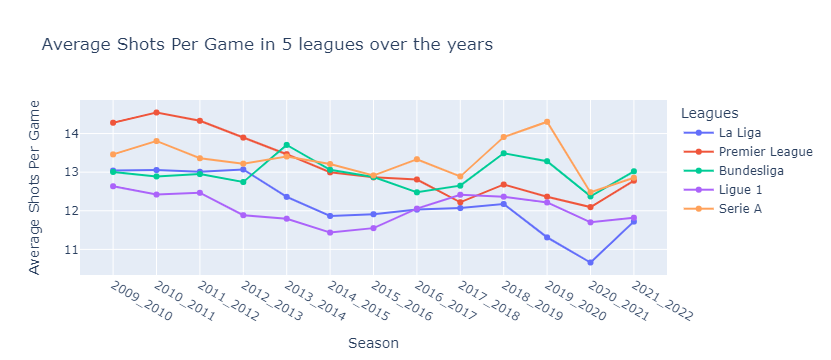

In [66]:
fig = go.Figure()
fig.add_scatter(x=laliga_all["Season"], y=laliga_all["Avg Shots Pg"], name="La Liga")
fig.add_scatter(x=epl_all["Season"], y=epl_all["Avg Shots Pg"], name="Premier League")
fig.add_scatter(x=bundesliga_all["Season"], y=bundesliga_all["Avg Shots Pg"], name="Bundesliga")
fig.add_scatter(x=ligue1_all["Season"], y=ligue1_all["Avg Shots Pg"], name="Ligue 1")
fig.add_scatter(x=seriea_all["Season"], y=seriea_all["Avg Shots Pg"], name="Serie A")
fig.update_layout(
    title="Average Shots Per Game in 5 leagues over the years",
    xaxis_title="Season",
    yaxis_title="Average Shots Per Game",
    legend_title="Leagues"
)
fig.show()

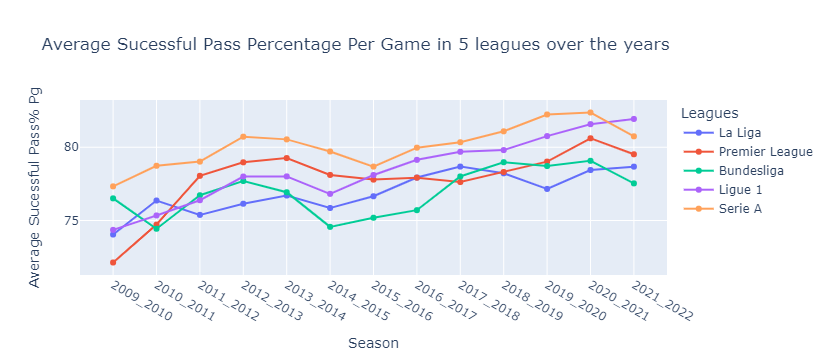

In [67]:
fig = go.Figure()
fig.add_scatter(x=laliga_all["Season"], y=laliga_all["Avg Successful Pass%"], name="La Liga")
fig.add_scatter(x=epl_all["Season"], y=epl_all["Avg Successful Pass%"], name="Premier League")
fig.add_scatter(x=bundesliga_all["Season"], y=bundesliga_all["Avg Successful Pass%"], name="Bundesliga")
fig.add_scatter(x=ligue1_all["Season"], y=ligue1_all["Avg Successful Pass%"], name="Ligue 1")
fig.add_scatter(x=seriea_all["Season"], y=seriea_all["Avg Successful Pass%"], name="Serie A")
fig.update_layout(
    title="Average Sucessful Pass Percentage Per Game in 5 leagues over the years",
    xaxis_title="Season",
    yaxis_title="Average Sucessful Pass% Pg",
    legend_title="Leagues"
)
fig.show()

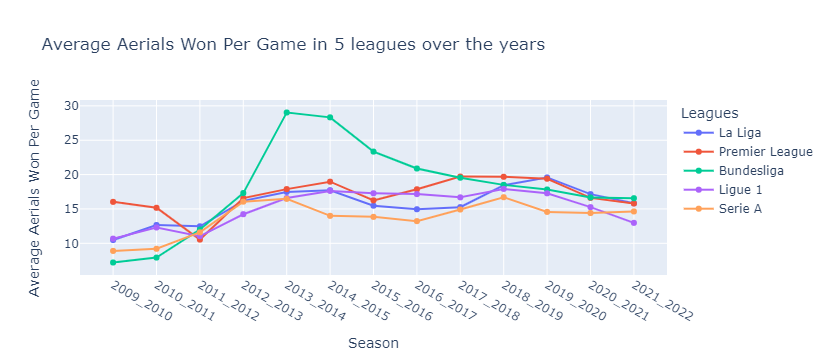

In [68]:
fig = go.Figure()
fig.add_scatter(x=laliga_all["Season"], y=laliga_all["Avg Aerials Won"], name="La Liga")
fig.add_scatter(x=epl_all["Season"], y=epl_all["Avg Aerials Won"], name="Premier League")
fig.add_scatter(x=bundesliga_all["Season"], y=bundesliga_all["Avg Aerials Won"], name="Bundesliga")
fig.add_scatter(x=ligue1_all["Season"], y=ligue1_all["Avg Aerials Won"], name="Ligue 1")
fig.add_scatter(x=seriea_all["Season"], y=seriea_all["Avg Aerials Won"], name="Serie A")
fig.update_layout(
    title="Average Aerials Won Per Game in 5 leagues over the years",
    xaxis_title="Season",
    yaxis_title="Average Aerials Won Per Game",
    legend_title="Leagues"
)
fig.show()

# Goal Types

In [70]:
df = pd.read_csv("data/LaLiga/2010_2011/stage-goals-for.csv")

In [112]:
def open_play_box_plot(league):
    fig = go.Figure()
    open_play_mean = []
    season = []

    for dir in os.listdir(f'data\\{league}'):
        path = os.path.join(f'data\\{league}', dir, 'stage-goals-for.csv')
        df = pd.read_csv(path)
        fig.add_trace(go.Box(y=df["Open Play"],
                             name=dir, fillcolor='aqua',
                             line={'color' : 'blue'}
                            ))
        open_play_mean.append(df["Open Play"].mean())
        season.append(dir)

    fig.add_scatter(x=season, y=open_play_mean, name="Average number of open plays", line={'color': 'red'})
    fig.update_layout(
        title=f"Open Play Distribution in {league} over the years",
        xaxis_title="Season",
        yaxis_title="Open Plays Distrubution",
        width=850,
        height=500
    )
    fig.show()

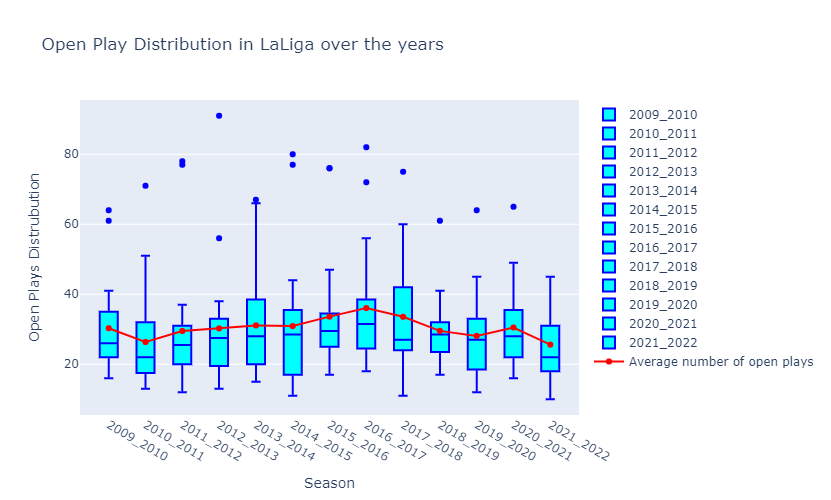

In [113]:
open_play_box_plot('LaLiga')

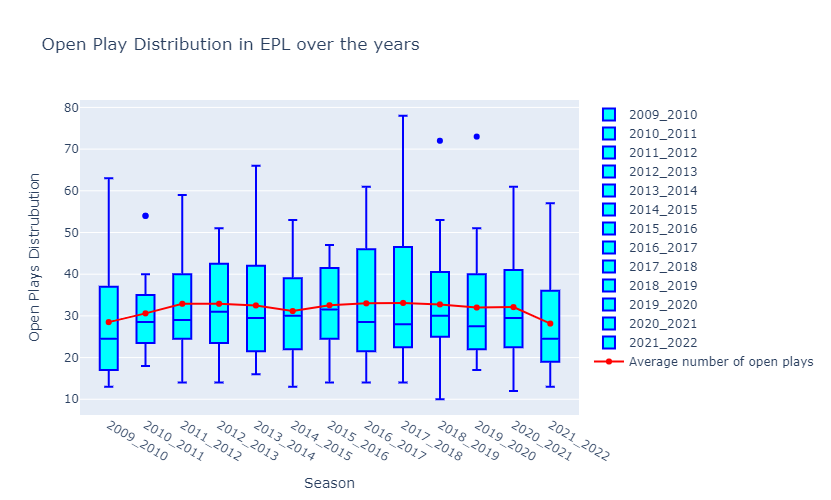

In [114]:
open_play_box_plot('EPL')

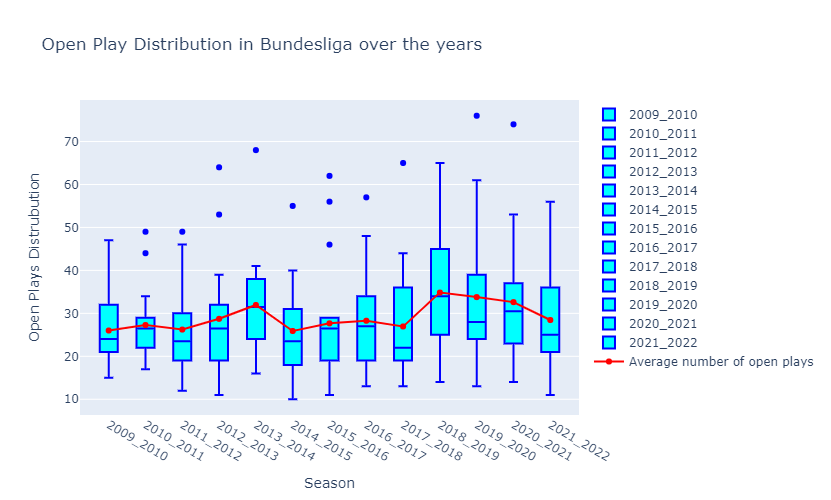

In [115]:
open_play_box_plot('Bundesliga')

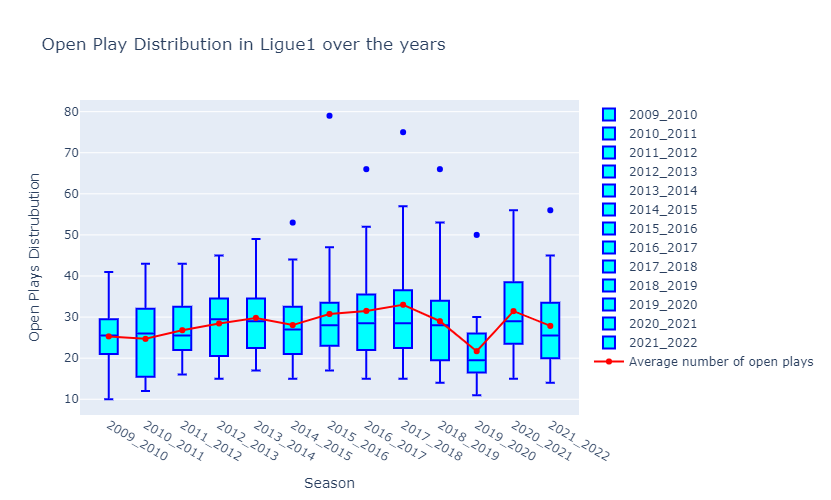

In [116]:
open_play_box_plot('Ligue1')

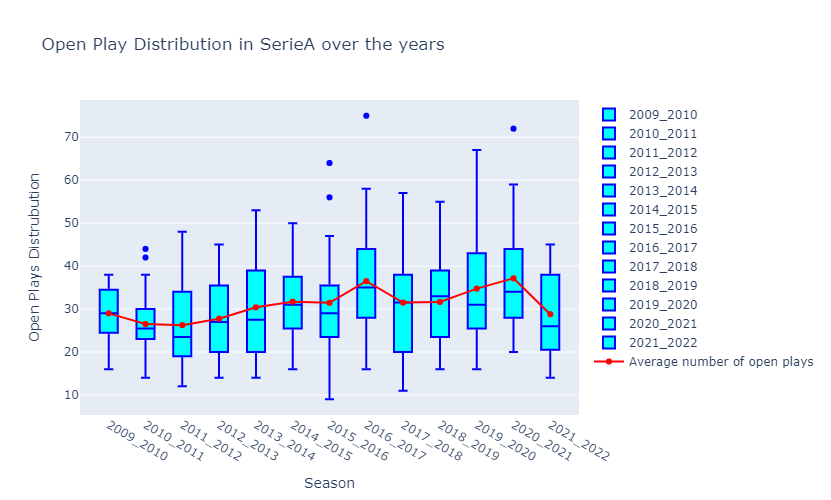

In [118]:
open_play_box_plot('SerieA')